In [9]:
#=
juliamap(c,z; maxiter) :
  Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero
if the iteration never diverges.

 - c : complex constant definining the set
 - z : complex number being iterated
 - maxiter : maximum iteration number, defaults to 100
=#
function juliamap(c, z; maxiter=100)
    for n = 1:maxiter
        z = z^2 + c
        if abs(z) > 2
            return n
        end
    end
    return 0
end


juliamap (generic function with 1 method)

In [10]:
@doc juliamap

No documentation found.

`juliamap` is a generic `Function`.

```julia
# 1 method for generic function "juliamap":
juliamap(c, z) at In[9]:13
```


In [11]:
"""
juliamap1(c,z; maxiter) :
  Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero
if the iteration never diverges.

 - c : complex constant definining the set
 - z : complex number being iterated
 - maxiter : maximum iteration number, defaults to 100
"""
function juliamap1(c, z; maxiter=100)
    for n = 1:maxiter
        z = z^2 + c
        if abs(z) > 2
            return n
        end
    end
    return 0
end


juliamap1 (generic function with 1 method)

In [12]:
@doc juliamap1

juliamap1(c,z; maxiter) :   Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero if the iteration never diverges.

  * c : complex constant definining the set
  * z : complex number being iterated
  * maxiter : maximum iteration number, defaults to 100


I use """...""" or #= ... =# comments, I get the same result with @doc functionName

In [13]:
# Specialize juliamap to c=0
j0(z) = juliamap(0,z)

# Vectorize j0 over arrays of Complex numbers
@vectorize_1arg Complex j0

# List the available methods for j0 for different types
methods(j0)

# 4 methods for generic function "j0":
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},1}) at operators.jl:380
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},2}) at operators.jl:381
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},N}) at operators.jl:383
j0(z) at In[13]:2

**Why does j0 now include a method that handles this type?**  (I'm not sure)

Because we vectorize_1arg Complex j0, which set z to complex number.

In [14]:
# Create a complex plane
function complex_plane(xmin=-2, xmax=2, ymin=-2, ymax=2; xpoints=2000, ypoints=2000)
    # y is a column vector
    y = linspace(ymin, ymax, ypoints)

    # x uses a transpose, yielding a row vector
    x = linspace(xmin, xmax, xpoints)'

    # z uses broadcasted addition and multiplication to create a plane
    z = x .+ y.*im;

    # The final line of a block is treated as the return value, in the absence
    # of an explicit return statement
end

complex_plane (generic function with 5 methods)

In [15]:
# The vectorized function can be applied directly to the plane
@time cp = complex_plane()
@time j0p = j0(cp)

  0.926271 seconds (571.21 k allocations: 85.577 MB, 1.78% gc time)
  0.899113 seconds (37.96 k allocations: 32.264 MB, 2.11% gc time)


2000x2000 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1

**How this code works**

function complex_plane is to create a complex number z and create the plane. 
j0 transfer the complex plane z to function juliamap
function juliamap change the complex number to positive integers, which means before 100 times if its abusolute value greater than 2, return the times of computing z = z^2 + c until , otherwise return 0.
So at last we see a positive integer plane.

**What's the difference between the comma and the semicolon in the list of arguments?** ( I don't know)

There isn't big difference


In [16]:
immutable ComplexPlane
    x :: LinSpace{Float64}
    y :: LinSpace{Float64}
    z :: Array{Complex{Float64},2}
    
    function ComplexPlane(xmin=-2, xmax=2, ymin=-2, ymax=2;
                            xpoints=2000, ypoints=2000)
        x = linspace(xmin, xmax, xpoints)
        y = linspace(ymin, ymax, ypoints)
        z = x' .+ y.*im
        new(x,y,z)
    end
end

In [17]:
cp = ComplexPlane(xpoints=200,ypoints=200);
typeof(cp)

ComplexPlane

In [18]:
print(typeof(cp.x))
j0(cp.z)

LinSpace{Float64}

200x200 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

**What is being done here? **


**What is "immutable" vs. "type"?**

**How does this method compare to a Python class?**


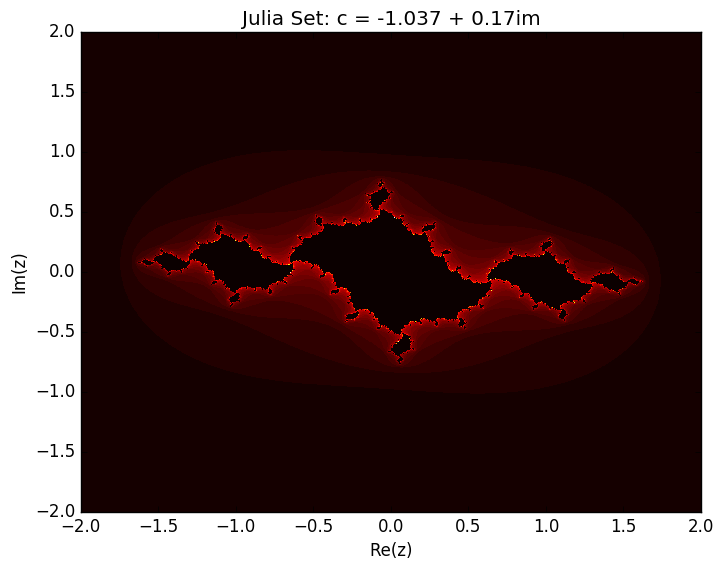

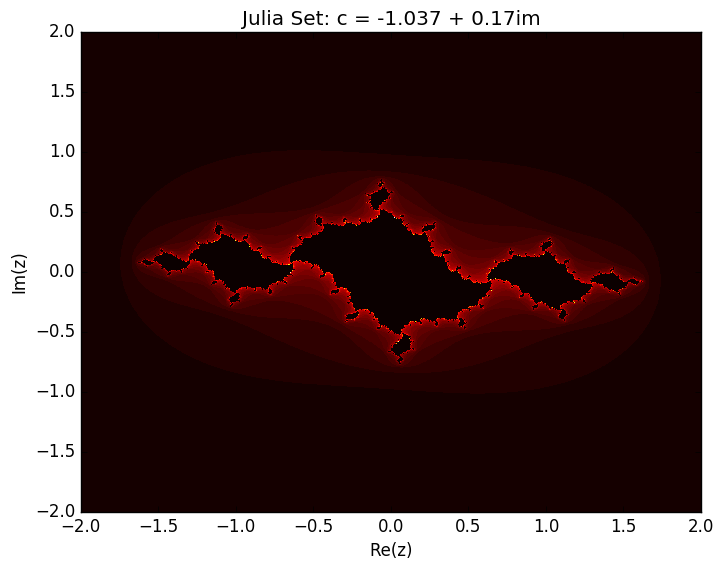

In [15]:
using PyPlot                         #  Load package into the current namespace
c = -1.037 + 0.17im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file

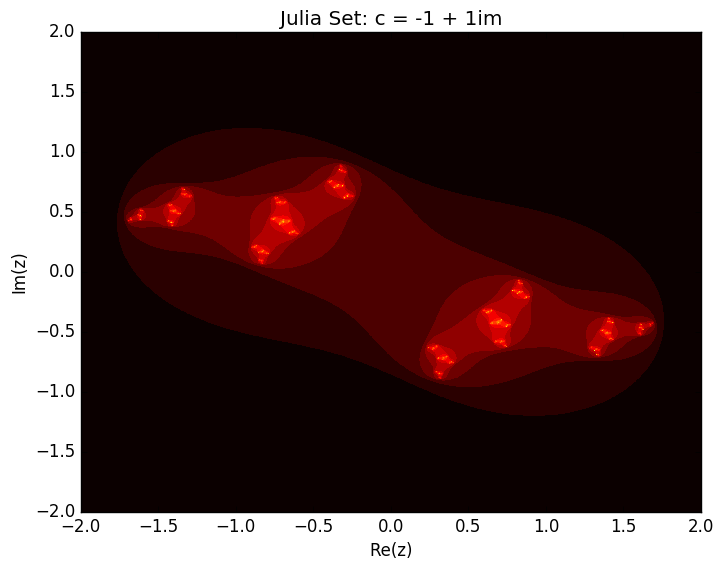

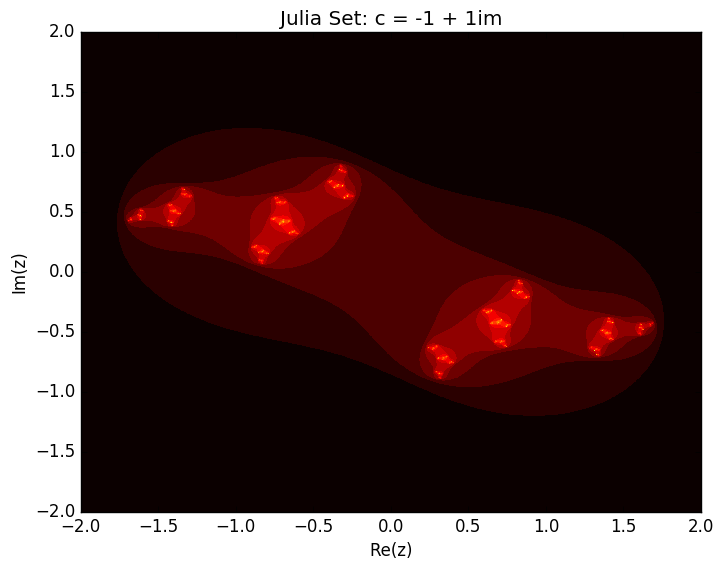

In [16]:
using PyPlot                         #  Load package into the current namespace
c = -1 + im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file

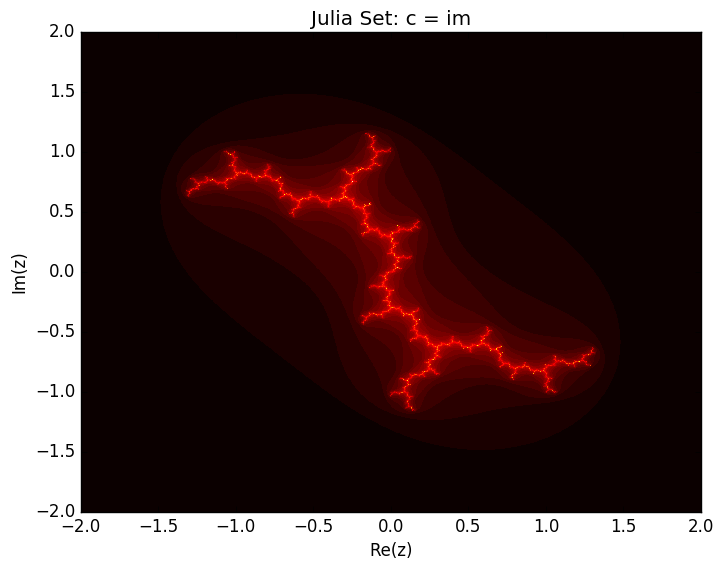

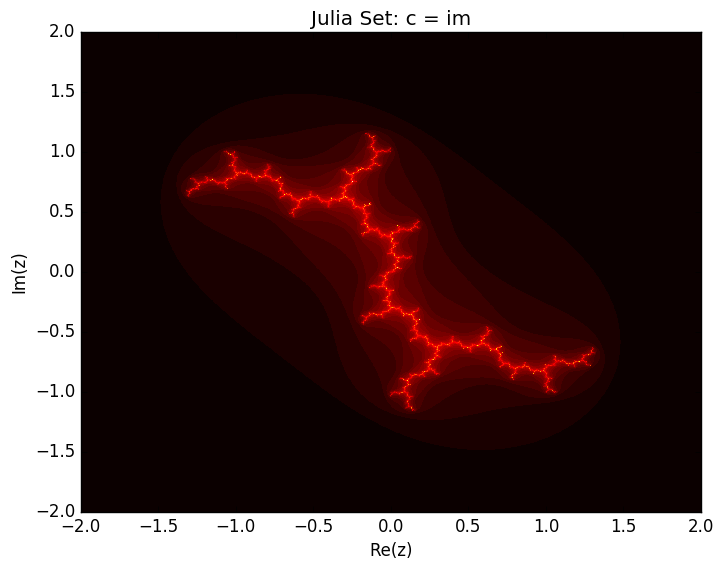

In [17]:
using PyPlot                         #  Load package into the current namespace
c = im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file

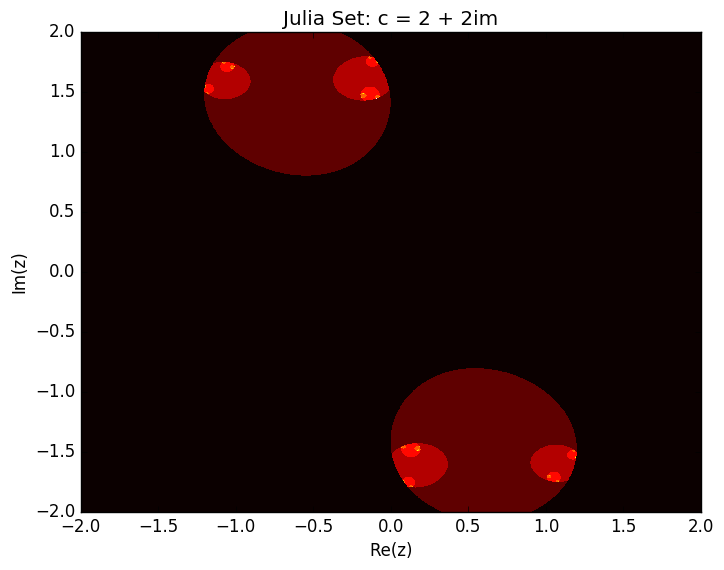

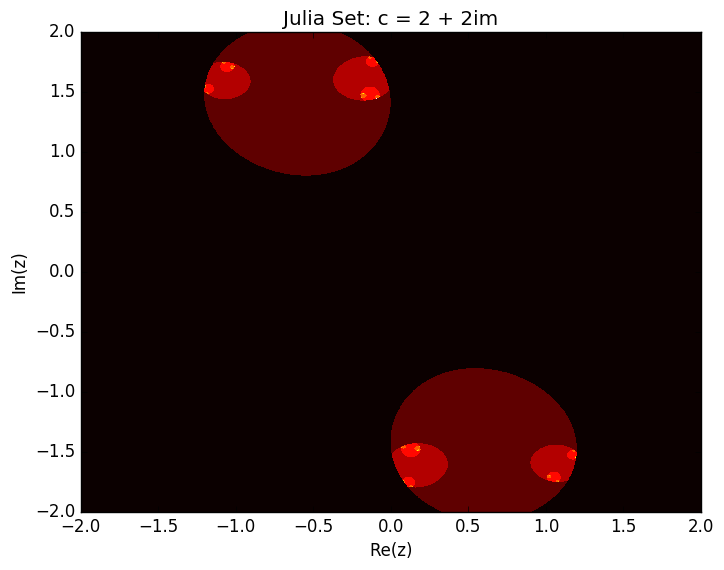

In [19]:
using PyPlot                         #  Load package into the current namespace
c = 2 + 2im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file

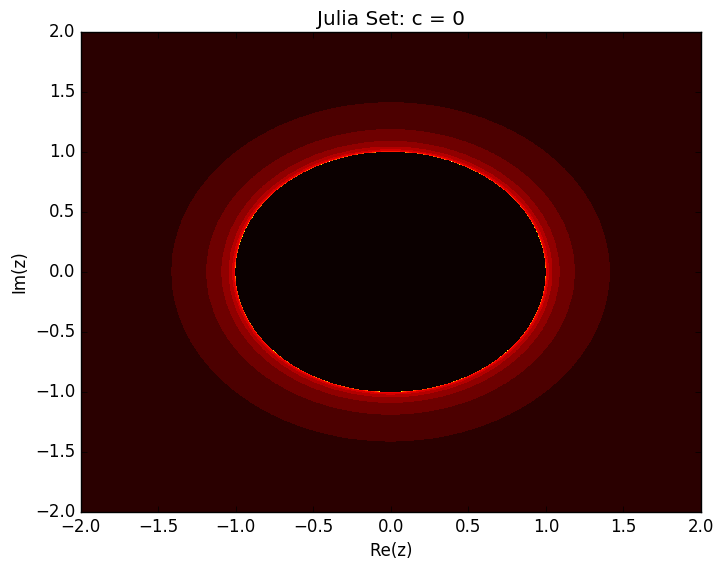

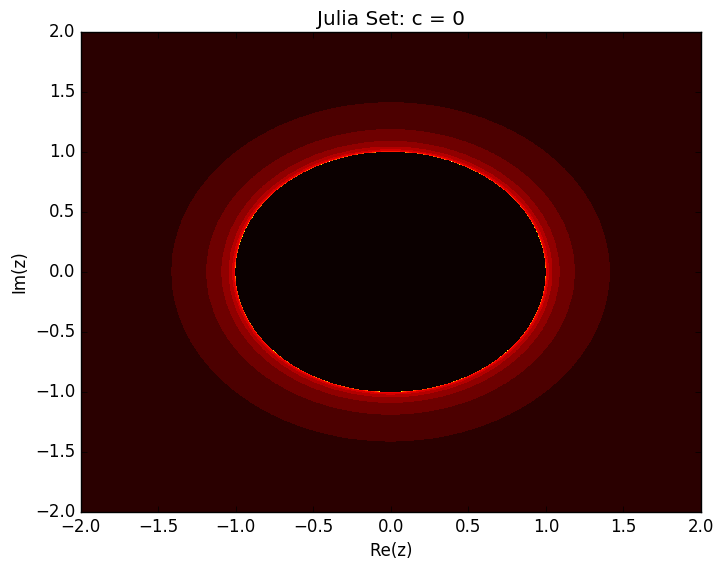

In [20]:
using PyPlot                         #  Load package into the current namespace
c = 0                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file

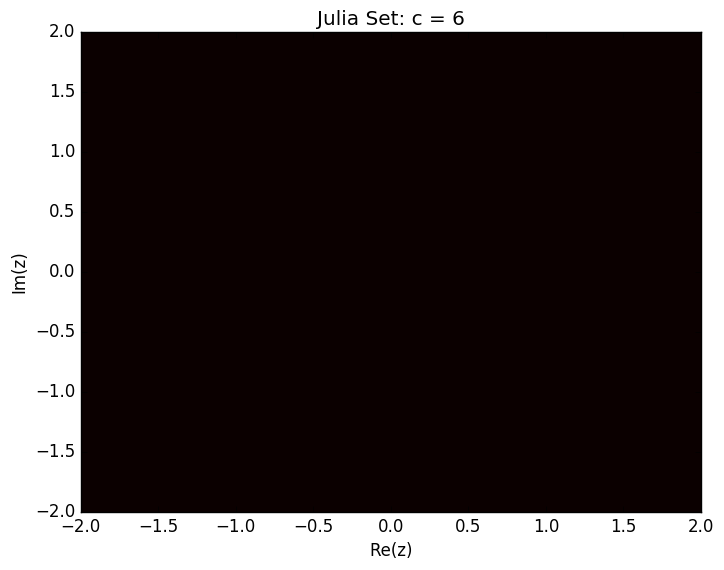

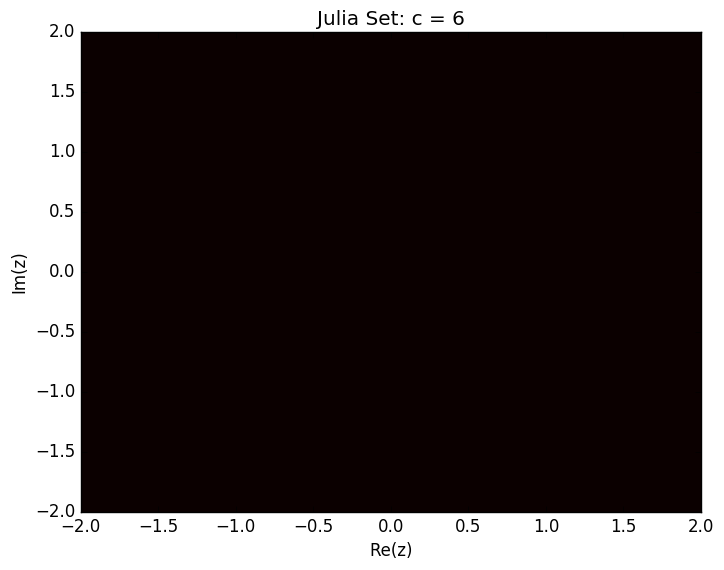

In [22]:
using PyPlot                         #  Load package into the current namespace
c = 6               #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file